# XGBoost on MCR & MT Data

16 - 02 - 2023 | Add xgb_mcr.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file = r'/content/drive/MyDrive/Colab/xgb-mcr/dataset.csv'

Data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)

# random sample of dataset
def fraction(df, percentage):
    return df.sample(frac=percentage)

df_frac = fraction(df, 0.1)

# dataset
dataset = df_frac.values
X = dataset[:, 6] # mt column
print(len(X))
Y = dataset[:, 5] # mcr column
print(len(Y))

18000
18000


Scatter

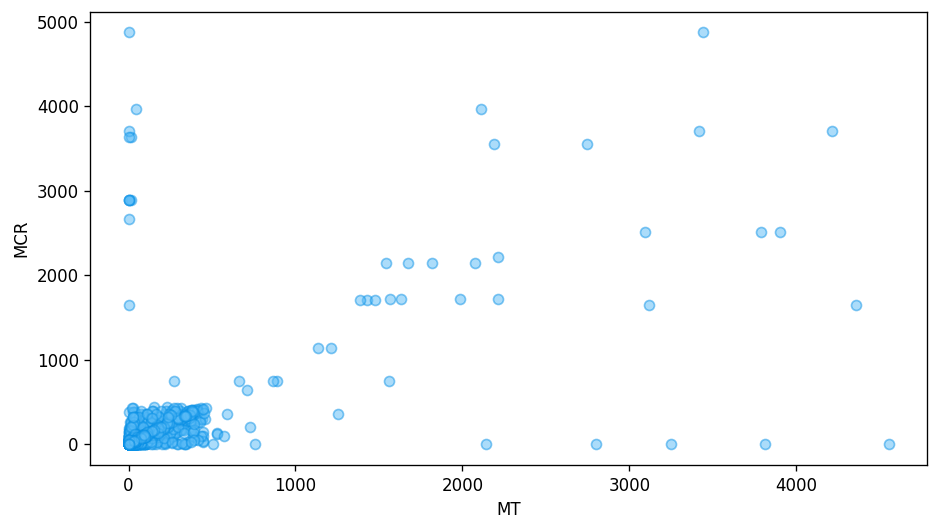

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X, y=Y, color="#59bbf7", marker="o",alpha=0.5, edgecolors="#0991e6")
plt.ylabel('MCR', fontsize=10)
plt.xlabel('MT', fontsize=10)
plt.show()

Reshape + Split

In [5]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(13500, 1)
(13500,)
(4500, 1)
(4500,)


Gradient Boosting Regressor

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

#model
xgb = GradientBoostingRegressor(n_estimators=100)
xgb.fit(X_train, Y_train)

#prediction
Y_pred = xgb.predict(X_test)

# r2 score
print(xgb.score(X_train, Y_train))
print(xgb.score(X_test, Y_test))

0.6954698043174488
0.3276639641814243


Mean absolute percentage error (MAPE)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  13.82465326720029
MAE :  12.903515592004988


Graph

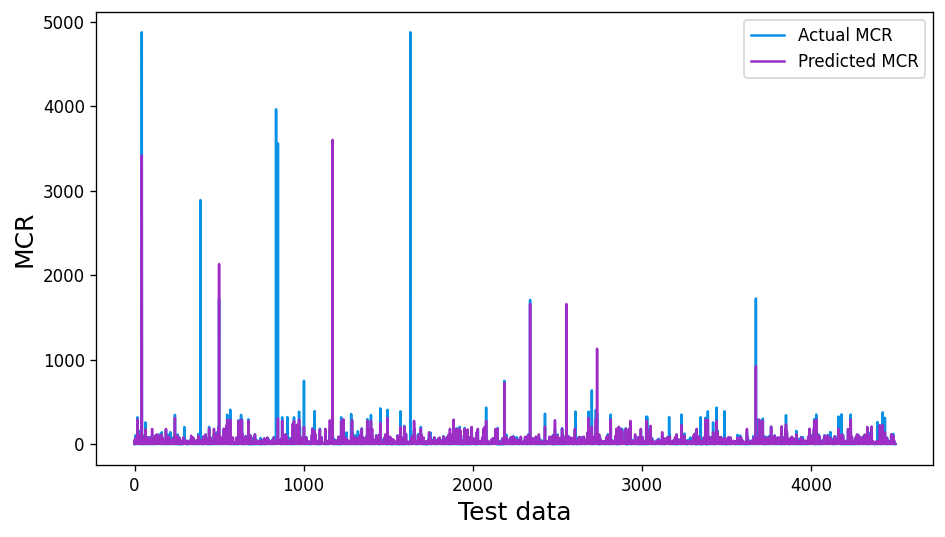

In [8]:
plt.figure(figsize=(9, 5), dpi=120)
plt.plot(Y_test, label='Actual MCR', color="#0991e6")
plt.plot(Y_pred, label='Predicted MCR', color="#9D2EC5")
plt.ylabel('MCR', fontsize=15)
plt.xlabel('Test data', fontsize=15)
plt.legend()
plt.show()